In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,019","3,938,764"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,660,315"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"17,002,014","14,231,730"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,051,800","5,095,327"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.48


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.87     32.47      0.00
           survey      4.43     26.63      0.00
HOV2       model       8.13     18.98      1.81
           survey      6.97     16.68      0.04
HOV3+      model       9.07     20.39      2.01
           survey     10.42     20.52      0.11
SOV        model       7.95     19.39      1.71
           survey      8.53     19.48      0.16
School Bus model       3.17     10.46      0.63
TNC        model       7.16     19.13      1.62
           survey      3.71     13.44      0.00
Transit    model      10.44     39.99      2.70
           survey      7.44     32.48      3.12
Walk       model       0.70     14.05      0.00
           survey      0.87     17.51      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.59     17.25      0.00
           survey      2.58     15.48      0.00
HOV2       model       3.46     10.77      0.71
           survey      3.61     11.21      0.08
HOV3+      model       3.73     11.18      0.77
           survey      4.10     11.82      0.01
SOV        model       5.83     15.88      1.23
           survey      8.31     18.11      0.30
School Bus model       3.50     10.79      0.72
           survey      3.30     10.34      0.00
TNC        model       3.46     12.93      0.69
           survey      2.24     14.53      0.00
Transit    model       5.46     35.53      0.19
           survey      8.06     24.02      3.04
Walk       model       1.26     25.27      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,443,087","2,855,094"
1,"912,932","1,083,669"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 0-4,NaN,"228,256"
Child Age 5-15,"557,103","514,797"
Full-Time Worker,"151,907","130,061"
High School Student Age 16+,"127,563","167,806"
Non-Working Adult Age 65+,62,37
Non-Working Adult Age <65,"2,490","9,840"
Part-Time Worker,"2,409","5,775"
University Student,"71,398","27,096"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"117,045","118,883"
1.0,"466,147","331,977"
2.0,"450,950","445,744"
3+,"255,840","234,438"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     626
0.0    model   47,710   17,401   11,447    4,367  36,106
       survey  49,380   30,866    9,139        0  29,499
1.0    model   59,755   65,858   68,512   32,143 239,786
       survey  76,760   59,801   59,509        0 135,906
2.0    model   21,171   30,174   40,135   22,744 336,649
       survey  64,139   22,390   58,239        0 300,976
3.0    model    5,103    8,057   11,557    7,186 134,658
       survey  19,121    6,579    3,844        0 112,335
4+     model    2,082    3,204    5,475    3,517  74,915
       survey  28,251    4,064    4,775        0  55,470

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

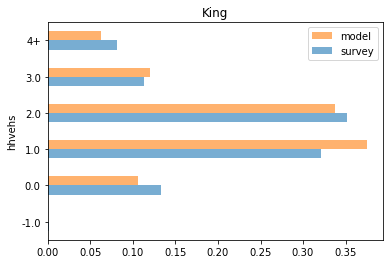

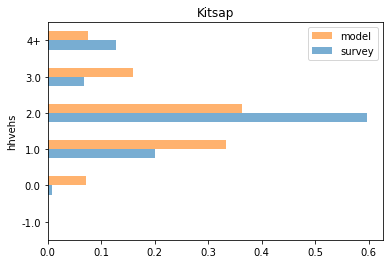

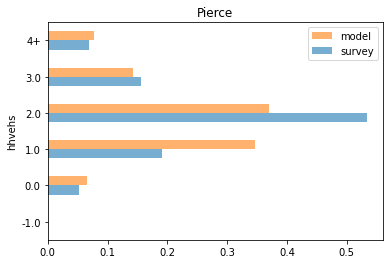

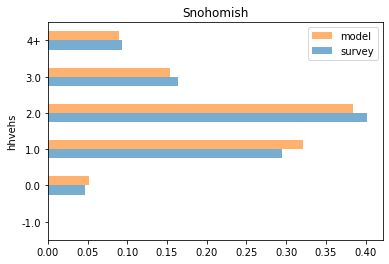

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,031,021    734  30,877    35,048
Kitsap          9,562 22,213   1,904       125
Pierce         62,541    689 151,306       435
Snohomish      74,756     38     241   130,067